In [14]:
# This Notebook is created with VS Code on Windows
# Create python virtual environment
#!python -m venv .venv
# If you want to use it on macOS/Linux
# You may need to run sudo apt-get install python3-venv first
#python3 -m venv .venv

# Install Python Packages
!pip install --user --upgrade pip
!pip install --user seaborn
!pip install --user numpy
!pip install --user pandas
!pip install --user matplotlib
!pip install --user plotly
!pip install --user nbformat


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [18, 8]

In [23]:
# Import Tables
reviews = pd.read_csv('./ml-latest-small/ratings.csv', names=['userId', 'movieId', 'rating', 'timestamp'], delimiter=',', engine='python')
movies = pd.read_csv('./ml-latest-small/movies.csv', names=['movieId', 'title', 'genres'], delimiter=',', engine='python')
users = pd.read_csv('./ml-latest-small/users.csv', names=['userId', 'gender', 'age', 'occupation', 'zip'], delimiter='::', engine='python')

# Print Table shape
print('Reviews shape:', reviews.shape)
print('Users shape:', users.shape)
print('Movies shape:', movies.shape)

Reviews shape: (100836, 4)
Users shape: (610, 5)
Movies shape: (9742, 3)


In [25]:
# Drop unused Attributes
reviews.drop(['timestamp'], axis=1, inplace=True) # Time
users.drop(['zip'], axis=1, inplace=True) # Zip-Code

# Extract the movie year from title to extra attrbute
movies['release_year'] = movies['title'].str.extract(r'(?:\((\d{4})\))?\s*$', expand=False)

In [26]:
# print movie table
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres release_year  
0  Adventure|Animation|Children|Comedy|Fantasy         1995  
1                   Adventure|Children|Fantasy         1995  
2                               Comedy|Romance         1995  
3                         Comedy|Drama|Romance         1995  
4                                       Comedy         1995

In [27]:
# changed feature values based on README_users.txt

ages_map = {1: 'Under 18',
            18: '18 - 24',
            25: '25 - 34',
            35: '35 - 44',
            45: '45 - 49',
            50: '50 - 55',
            56: '56+'}

occupations_map = {0: 'Not specified',
                   1: 'Academic / Educator',
                   2: 'Artist',
                   3: 'Clerical / Admin',
                   4: 'College / Grad Student',
                   5: 'Customer Service',
                   6: 'Doctor / Health Care',
                   7: 'Executive / Managerial',
                   8: 'Farmer',
                   9: 'Homemaker',
                   10: 'K-12 student',
                   11: 'Lawyer',
                   12: 'Programmer',
                   13: 'Retired',
                   14: 'Sales / Marketing',
                   15: 'Scientist',
                   16: 'Self-Employed',
                   17: 'Technician / Engineer',
                   18: 'Tradesman / Craftsman',
                   19: 'Unemployed',
                   20: 'Writer'}

gender_map = {'M': 'Male', 'F': 'Female'}

users['age'] = users['age'].map(ages_map)
users['occupation'] = users['occupation'].map(occupations_map)
users['gender'] = users['gender'].map(gender_map)

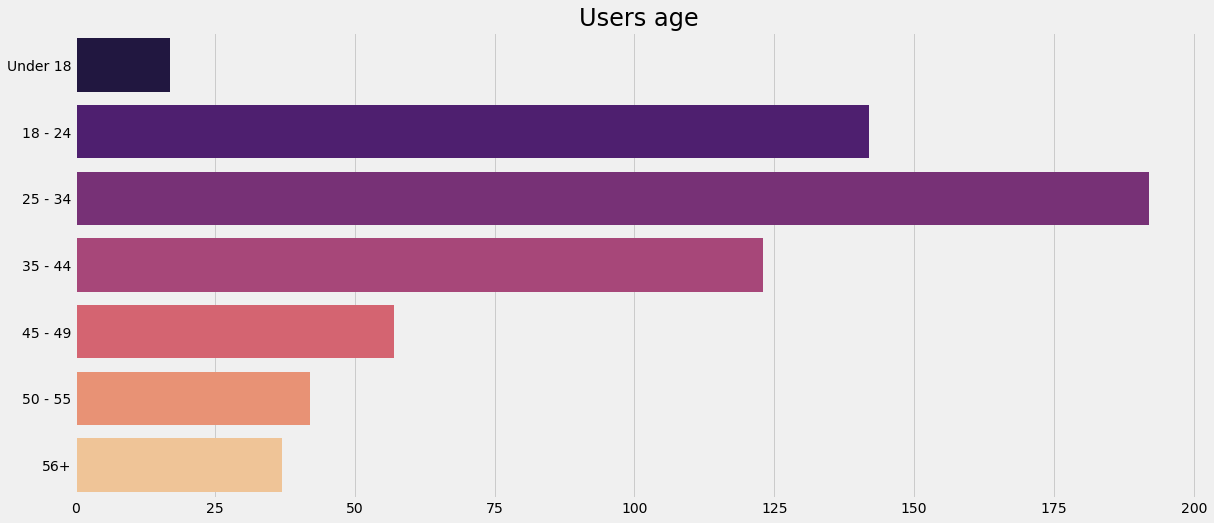

In [28]:
age_reindex = ['Under 18', '18 - 24', '25 - 34', '35 - 44', '45 - 49', '50 - 55', '56+']

age_counts = users['age'].value_counts().reindex(age_reindex)

sns.barplot(x=age_counts.values,
            y=age_counts.index,
            palette='magma').set_title(
                'Users age', fontsize=24)

plt.show()